## Klassifikation

Wir nutzen ein Datenset, das handschriftliche Ziffern in Form von 8x8 Feldern mit Werten der Farbstärkte   darstellt. Ein Beschreibung des Datensets gib es bei [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) und im 
[UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).


In [2]:
# Wir importieren eine Funktion zu laden des Datensets und rufen dieses auf.
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
# Die Daten und Metadaten sind in einem sogenannten "Bunch"-Objekt organisiert
type(digits)

sklearn.utils.Bunch

In [4]:
# Dieser Bunch hat folgende Attribute.
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [5]:
# Schauen wir uns mal die Beschreibung an
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
# Die eigentlichen Daten sind in einem numpy-Array abgelegt.
type(digits.data)

numpy.ndarray

In [7]:
# Schauen wir es uns mal an.
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
# Schauen wir uns die Dimension der Matrix an - es handelt 
# sich um eine zweidimentionsale Matrix mit 1797 Zeilen und 64 Spalten.
# Es sind 1797 Bilder und 64 (8x8 Felder) Features.
digits.data.shape

(1797, 64)

In [55]:
# Das Target-Attribute ist ebenfalls ein numpy-array ...
type(digits.target)

numpy.ndarray

In [56]:
# ... allerding mit nur einer Dimension.
digits.target.shape

(1797,)

In [11]:
# Jeder Wert entspricht der geschriebenen Nummer
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [57]:
# Das Bunch-Objekt hat noch das Attribute "target_names"
# Normalerweise wird jeder Zahl in "targent" hier ein Name zugeordnen.
# Da es sich aber tatsächlich um Ziffern von 0 - 9 handelt, ist das in diesem
# nicht wirklich nötig.
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
# In diesem Datenset gibt es zusätzlich noch ein Attribute "images".
# Es enthält für jede geschriebene Ziffer die Farbwerte in ein 8x8 Matrix.
len(digits.images)

1797

In [59]:
# Schauen wir uns zum Beispiel das erst Bild an ...
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [60]:
# ... oder das zehnte Bild
digits.images[9]

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

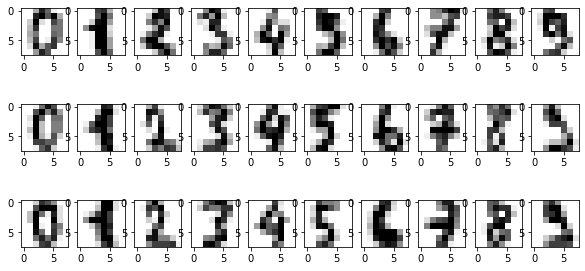

In [16]:
# Wir können die in dieser Form gespeicherten Farbintensitäten
# auch mit matplotlib anzeigen lassen. Hier zum Beispiel für die
# ersten 30 Bilder (wenn man mehr haben möchte muss man in subplot
# mehr als 3 Zeilen angeben.)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 10, figsize=(10, 5))
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap=plt.cm.gray_r)

In [17]:
# Um einen Klassifikator für ein Klassifikation zu trainieren
# und dann später seine Güte zu bewerten, wird das Datenset 
# (genauer gesagt die Attribute "data" und "target") in
# ein Trainingsset (75%) und Testset (25%) aufgeteilt. Die Konvention
# ist hier eine großes X für den Variablen der Datenmatrix und ein kleines y
# für den Target-Vektor zu nutzen.

# Anmerkung - bei einigen der folgenden Schritte wird 
# von bestimmten zufälligen Zuständen ausgegagen. Um diese
# fest zu setzen und somit die Analyse reproduzierbar zu machen
# kann man den Parameter random_state nutzen und mit einer Zahl
# versehen.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits['data'], digits['target'], random_state=1)

In [18]:
# Die Maße der zweidimensionalen Trainigs-Daten-Matrix
X_train.shape

(1347, 64)

In [19]:
# Die Maße der zweidimensionalen Test-Daten-Matrix
X_test.shape

(450, 64)

In [20]:
# Die Länge des Trainingsvektor entspricht der Anzahl an 
# Zeilen der Trianingsmatrix.
y_train.shape

(1347,)

In [21]:
# Die Länge des Testsvektors entspricht der Anzahl an 
# Zeilen der Testsmatrix.
y_test.shape

(450,)

In [22]:
# Wir werden zuerst mit einem k-Nearest-Neighbor-Klassifizierer Arbeiten
# und laden dazu die Klasse ...
from sklearn.neighbors import KNeighborsClassifier

In [61]:
# ... und erzeugen ein Objekt davon. Hierbei können wird die Anzahl an 
# zu betrachteten Nachbarn angeben:
knn_clf = KNeighborsClassifier(n_neighbors=1)

In [23]:
# Jetzt trainieren wir den Klassifikator mit den Trainingsdaten.
# Dafür wird in scikit-learn unabhängig von Klassifikator die
# Methode "fit" genutzt.
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [24]:
# Herzlichen Glückwunsch - wir haben unser aller erstes 
# Klassifikator-Modell gebaut und trainiert. 
# Jetzt kann mit diesem neue Daten (also Vektoren der Länger 64, die
# die 8x8 Bilder darstellen) klassifizieren - in diesem
# Fall also Vorauszusagen, welche Ziffer dargestellt wurde.
#
# Wir haben unsere Testdaten noch verfügbar und können die Methode "predict"
# des trainierten Klassifiers nutzen und erhalten die Voraussagen.
knn_clf.predict(X_test)

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       9, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 3, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 7, 0, 5,

In [25]:
# Da wir für das Testset aber auch wissen welche Ziffern tatsächlich 
# herauskommen sollte, können wir die Methode "score" des Klassifiers 
# nutzen. Diese führt die Voraussage durch und vergleicht sie mit den 
# tatsächlichen Target-Werten. Am Ende bekommen wir einen Wert zwischen 
# 0 (schlecht) und 1 (gut).
knn_clf.score(X_test, y_test)

0.9888888888888889

In [62]:
# Jetzt führen wir die das gleich Verfahren (Erstellen, Traininen und Testen)
# dieses Classifiers mit 3 Nachbarn als Parameter durch.
knn_clf_3 = KNeighborsClassifier(n_neighbors=3)
knn_clf_3.fit(X_train, y_train)
knn_clf_3.score(X_test, y_test)

0.9911111111111112

In [27]:
# Das schöne an scikit-learn ist, dass alle Klassifikatoren 
# die gleichen Methoden besitzten. Sprich anderen Klassifikatoren
# nutzen auch fit, predict und score.
#
# Machen wir eine Klassifikation mit einem Random-Forest-Klassifikator:
from sklearn.ensemble import RandomForestClassifier
random_forest_cfl = RandomForestClassifier(random_state=1)

In [28]:
random_forest_cfl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [29]:
random_forest_cfl.score(X_test, y_test)

0.98

In [51]:
# Das gleiche machen wir nur für eine Klassifikation mit einem 
# künstlichen, neuralen Netz (Multi-Layer-Perceptron). Standardmäßig 
# hat das Netz ein eine Hidden-Layer mit 100 Nodes.
from sklearn.neural_network import MLPClassifier

In [52]:
mlpc = MLPClassifier(random_state=1)
mlpc.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [53]:
mlpc.score(X_test, y_test)

0.9755555555555555

In [54]:
# Wir können die Anzahl an Hidden-Layer und Anzahl an Nodes in diesen
# als Parameter setzen (hier 3 Schichten mit mit 200, 100 und 20 Nodes).
# Man kann das ganze kondenensiert schreiben, indem man die
# Methodenaufrufe direkt verknüpft.
MLPClassifier(random_state=1, hidden_layer_sizes=(200, 100, 20)).fit(
    X_train, y_train).score(X_test, y_test)

0.9844444444444445